In [72]:
import numpy as np
import matplotlib.pyplot as plt
import graphlearning as gl
from scipy.optimize import minimize, LinearConstraint
import sklearn.datasets as datasets


Generate a sample of size 2 * n containing n data points from each class.
All data points are sampled from a dim-dimensional Gaussian.

[[3.1 3.6]
 [1.6 3.2]
 [2.6 2.4]
 [3.2 3.5]
 [3.7 2. ]
 [2.5 3.2]
 [2.7 1.4]
 [4.4 1.1]]
[0. 0. 0. 0. 1. 1. 1. 1.]


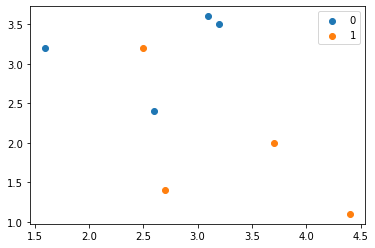

In [18]:
n = 4 # Sample size from each class
dim = 2
data = np.zeros((2 * n, dim))
mean1, cov1 = [2, 4], (1/2) * np.identity(dim)
mean2, cov2 = [4,2], (1/2) * np.identity(dim)
np.random.seed(1)
data[:n] = np.random.multivariate_normal(mean1, cov1, n)
np.random.seed(2)
data[n:] = np.random.multivariate_normal(mean2, cov2, n)

data = np.around(data, 1) #Round data to 1 decimal
#np.random.multivariate_normal([2,4], np.identity(dim), 10)
plt.scatter(data[:n, 0], data[:n, 1], label = '0')
plt.scatter(data[n:, 0], data[n:, 1], label = '1')
plt.legend()
print(data)

y = np.zeros(2*n)
y[n:] = 1
print(y)

In [4]:
W = gl.weightmatrix.epsilon_ball(data, 1)
G = gl.graph(W)
print(W.toarray())

[[1.         0.         0.         0.92311635 0.         0.12493021
  0.         0.        ]
 [0.         1.         0.         0.         0.         0.0391639
  0.         0.        ]
 [0.         0.         1.         0.         0.         0.07427358
  0.         0.        ]
 [0.92311635 0.         0.         1.         0.         0.09827359
  0.         0.        ]
 [0.         0.         0.         0.         1.         0.
  0.         0.        ]
 [0.12493021 0.0391639  0.07427358 0.09827359 0.         1.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  1.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         1.        ]]


Calculate $$I[u] = \frac{1}{p} \sum_{i,j=1}^n | \nabla u(x_i,x_j) |^p + \sum_{j=1}^m(y_j - \bar{y}) \cdot u(x_j)$$
where $$ \nabla u(x_i, x_j) = u(x_j) - u(x_i) $$

In [133]:
a = np.arange(16).reshape((4,2,2))
print(a)
print(np.apply_along_axis(np.linalg.norm, 2, a).T)

[[[ 0  1]
  [ 2  3]]

 [[ 4  5]
  [ 6  7]]

 [[ 8  9]
  [10 11]]

 [[12 13]
  [14 15]]]
[[ 1.          6.40312424 12.04159458 17.69180601]
 [ 3.60555128  9.21954446 14.86606875 20.51828453]]


In [165]:
4.0//2

2.0

In [173]:
"""
Computes the gradient of u
u: (n,k) matrix
"""
def grad(u, W):
    n = u.shape[0]
    k = u.shape[1]
    gradu = np.zeros((n,n,k))
    for i in range(n):
        for j in range(n):
            gradu[i][j] = u[j] - u[i]
    return gradu
            

"""
u: n*k matrix
y: (m,k) matrix
idx = vector of labelled indices
"""
def penergy(u_flattened, W, idx, y, p):
    k = y.shape[1]
    n = int(u_flattened.size/k)
    u = u_flattened.reshape((n,k))
    gradu = grad(u, W)
    first_summand = (1/p) * (np.apply_along_axis(np.linalg.norm, 2, gradu) ** p).sum()
    y_bar = (1/y.shape[0]) * y.sum(axis = 0)
    second_summand = np.sum( (y - y_bar) * u[idx] )
    return first_summand - second_summand

u = np.array([[1,0], [0,1], [1/2, 1/2]])
y = np.array([[1,0], [0,1]])
W = np.array([[0, 1, 1], [1,0,1], [1,1,0]])
idx = [0, 1]
p = 2

print(np.apply_along_axis(np.linalg.norm, 2, grad(u, W)))
print(penergy(u, W, idx, y, 2))
print(penergy(u, W, idx, y, 3))

[[0.         1.41421356 0.70710678]
 [1.41421356 0.         0.70710678]
 [0.70710678 0.70710678 0.        ]]
2.000000000000001
1.357022603955159


In [174]:
y = np.array([[1,0], [0,1]])
W = np.array([[0, 1, 1], [1,0,1], [1,1,0]])
idx = [0, 1]
n = 3
k = 2
p = 2

linear_constraint = LinearConstraint(np.ones(n*k), [0], [0])
res = minimize(penergy, x0 = np.ones(n * k), args = (W, idx, y, p), method = 'trust-constr', constraints = linear_constraint)
print(res.x.reshape(n, k))
print(penergy(res.x, W, idx, y, p))

[[ 8.33333285e-02 -8.33333285e-02]
 [-8.33333282e-02  8.33333283e-02]
 [ 4.78791958e-11 -8.01802276e-11]]
-0.08333333333333304


In [177]:
y = np.array([[1,0], [0,1]])
W = np.array([[0, 1, 1], [1,0,1], [1,1,0]])
idx = [0, 1]
n = 3
k = 2
p = 2

gl.ssl.poisson(W, solver = 'gradient_descent')
pred_labels = model.fit_predict(idx, y)
print(pred_labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [175]:
X,labels = datasets.make_moons(n_samples=500,noise = 0.1)
W = gl.weightmatrix.knn(X,10,symmetrize=False)

G = gl.graph(W)

train_ind = np.arange(10)
train_labels = labels[train_ind]

linear_constraint = LinearConstraint(np.array(G.degree_vector()), [0], [0])
res = minimize(penergy, x0 = np.ones(500), args = (G, labels, p), method = 'trust-constr', constraints = linear_constraint, options = {'maxiter':50, 'disp':True})
print(res)
print(penergy(res.x, G, y, p))


model = gl.ssl.poisson(W, solver='gradient_descent')
pred_labels = model.fit_predict(train_ind, train_labels)

accuracy = gl.ssl.ssl_accuracy(pred_labels, labels, len(train_ind))   
print("Accuracy: %.2f%%"%accuracy)

plt.scatter(X[:,0],X[:,1], c=pred_labels)
plt.scatter(X[train_ind,0],X[train_ind,1], c='r')
plt.show()

TypeError: penergy() missing 1 required positional argument: 'p'

10
Accuracy: 99.80%


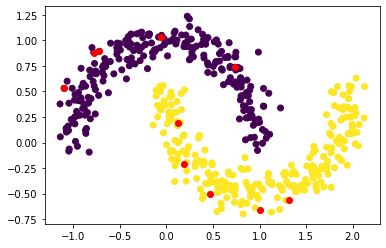

In [82]:
X,labels = datasets.make_moons(n_samples=500,noise=0.1)
W = gl.weightmatrix.knn(X,10,symmetrize=False)

train_ind = gl.trainsets.generate(labels, rate=5)
print(train_ind.size)
train_labels = labels[train_ind]

model = gl.ssl.poisson(W, solver='gradient_descent')
pred_labels = model.fit_predict(train_ind, train_labels)

accuracy = gl.ssl.ssl_accuracy(pred_labels, labels, len(train_ind))   
print("Accuracy: %.2f%%"%accuracy)

plt.scatter(X[:,0],X[:,1], c=pred_labels)
plt.scatter(X[train_ind,0],X[train_ind,1], c='r')
plt.show()